# Sales Analysis

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

#### <font color='blue'>Merging 12 months of sales data into a single CSV file <font>

In [2]:
df=pd.read_csv('./Data/Sales_April_2019.csv')

files=[file for file in os.listdir('./Data')] 

all_months_data=pd.DataFrame()

for file in files:
    df= pd.read_csv('./Data/'+file)
    all_months_data= pd.concat([all_months_data,df])
    
all_months_data.to_csv('annual.csv',index=False)

   ##### Updated dataframe

In [3]:
annual= pd.read_csv('annual.csv')
annual.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### <font color='blue'> Data Cleaning<font>


##### Dropping rows of NAN

In [4]:
nan_df= annual[annual.isna().any(axis=1)]  # NAN rows
nan_df.head()

annual.dropna(axis='index',how='all',inplace=True)
annual.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Dropping rows where the values are same as col name

In [5]:
filt = annual['Order Date'] == 'Order Date'
annual.drop(index=annual[filt].index, inplace=True)

##### Converting columns to correct type

In [6]:
annual.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [7]:
annual['Quantity Ordered'] = pd.to_numeric(annual['Quantity Ordered'])
annual['Price Each'] = pd.to_numeric(annual['Price Each'])

annual.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [8]:
annual.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

##### Adding Month Column

In [9]:
annual['Month'] = annual['Order Date'].str[0:2]
annual['Month']=annual['Month'].astype('int32')
annual.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


##### Adding Sales column

In [10]:
annual['Sales'] = annual['Quantity Ordered']*annual['Price Each']
annual.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [11]:
cols = list(annual.columns)
cols

['Order ID',
 'Product',
 'Quantity Ordered',
 'Price Each',
 'Order Date',
 'Purchase Address',
 'Month',
 'Sales']

In [12]:
annual = annual[cols[0:4]+[cols[-1]]+cols[4:len(cols)-1]]
annual.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


##### Adding City column

In [13]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

annual['City'] = annual['Purchase Address'].apply(lambda x: f"{get_city(x)}, {get_state(x)}")
annual

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,"Boston, MA"
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,"Los Angeles, CA"
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,8.97,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,"Los Angeles, CA"
186846,259354,iPhone,1,700.00,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,"San Francisco, CA"
186847,259355,iPhone,1,700.00,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,"San Francisco, CA"
186848,259356,34in Ultrawide Monitor,1,379.99,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,"San Francisco, CA"


#### <font color='blue'> Data Exploration<font>

#### Q1: <font color='red'>What was the best month for sales? How much was earned that month?

In [14]:
monthwise_sales = annual.select_dtypes(include='number').groupby(['Month']).sum() 
monthwise_sales

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


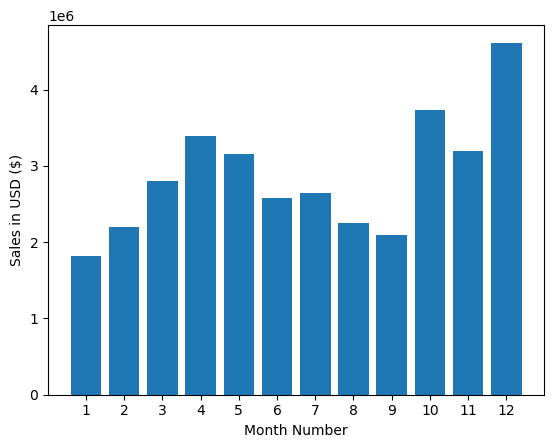

In [15]:
months = range(1,13)

plt.bar(months,monthwise_sales['Sales'])
plt.xticks(months)
plt.xlabel('Month Number')
plt.ylabel('Sales in USD ($)')
plt.show()

#### December was the best month for sales earning around 4 Million USD.

#### Q2:<font color='red'> Which city had the highest number of sales?

In [16]:
citywise_sales = annual[['City','Quantity Ordered','Price Each','Sales']].groupby(['City']).sum()
citywise_sales

,Quantity Ordered,Price Each,Sales
City,,,
"Atlanta, GA",16602,2779908.20,2795498.58
"Austin, TX",11153,1809873.61,1819581.75
"Boston, MA",22528,3637409.77,3661642.01
"Dallas, TX",16730,2752627.82,2767975.40
"Los Angeles, CA",33289,5421435.23,5452570.80
"New York City, NY",27932,4635370.83,4664317.43
"Portland, ME",2750,447189.25,449758.27
"Portland, OR",11303,1860558.22,1870732.34
"San Francisco, CA",50239,8211461.74,8262203.91


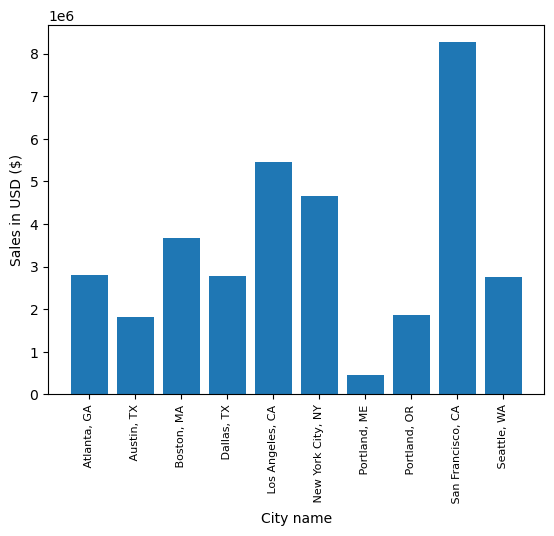

In [17]:
cities = [city for city,df in annual.groupby('City')]

plt.bar(cities,citywise_sales['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel('City name')
plt.ylabel('Sales in USD ($)')
plt.show()

#### San Francisco (CA) had the highest number of sales worth above 8 Million USD.

#### Q3: <font color='red'> What time should we display advertisements to maximize likelihood of customer's buying product?

In [18]:
annual.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,"Boston, MA"
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,"Los Angeles, CA"


In [19]:
annual['Order Date']=pd.to_datetime(annual['Order Date'])

C:\Users\shah_\AppData\Local\Temp\ipykernel_9520\2683344354.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  annual['Order Date']=pd.to_datetime(annual['Order Date'])


In [20]:
annual.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,"Boston, MA"
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,"Los Angeles, CA"


In [21]:
annual['Hour'] = annual['Order Date'].dt.hour
annual['Minute'] = annual['Order Date'].dt.minute
annual=annual.drop(columns='Minute')
annual.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,"Dallas, TX",8
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,"Boston, MA",22
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA",14
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA",14
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,"Los Angeles, CA",9


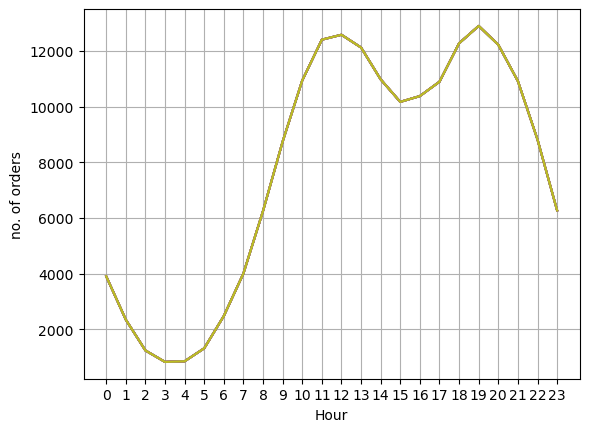

In [22]:
hours=[hour for hour,df in annual.groupby('Hour')]

# plotting line graph

plt.plot(hours, annual.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('no. of orders')


plt.show()

#### The peak times to advertise can be around 11am or 7pm

#### Q4:<font color='red'> What products are most often sold together?

##### Same Order Id means ordered together

In [23]:
df = annual[annual['Order ID'].duplicated(keep=False)]
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA",14
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA",14
18,176574,Google Phone,1,600.00,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,"Los Angeles, CA",19
19,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,"Los Angeles, CA",19
30,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,"Boston, MA",11


In [24]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

C:\Users\shah_\AppData\Local\Temp\ipykernel_9520\759627908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Grouped
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA",14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA",14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,"Los Angeles, CA",19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,"Los Angeles, CA",19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,"Boston, MA",11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [25]:
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head(10)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [26]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

#### iPhone and Lightning Charging Cable are sold together most often

#### Q5: <font color='red'> What product got sold the most? Why do you think it got sold the most?

In [41]:
product_grp= annual.groupby('Product')
product_grp.sum(numeric_only=True).sort_values('Quantity Ordered', ascending= False).head()

,Quantity Ordered,Price Each,Sales,Month,Hour
Product,,,,,
AAA Batteries (4-pack),31017,61716.59,92740.83,146370,297332
AA Batteries (4-pack),27635,79015.68,106118.40,145558,298342
USB-C Charging Cable,23975,261740.85,286501.25,154819,314645
Lightning Charging Cable,23217,323787.10,347094.15,153092,312529
Wired Headphones,20557,226395.18,246478.43,133397,271720


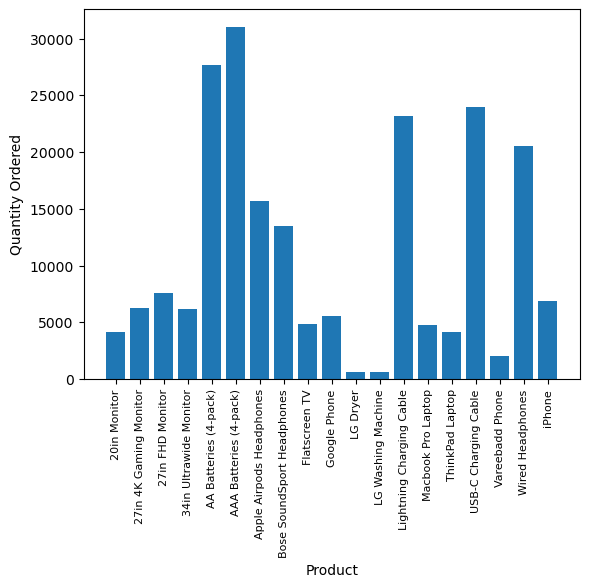

In [46]:
products = [product for product,df in product_grp]
quantity_ordered = product_group.sum(numeric_only=True)['Quantity Ordered']
plt.bar(products,quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation='vertical', size=8)

plt.show()

##### Average selling price for each product

In [43]:
prices = annual.groupby('Product')['Price Each'].mean()
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\shah_\AppData\Local\Temp\ipykernel_9520\3855423574.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  x1.set_xticklabels(products, rotation='vertical', size=8)


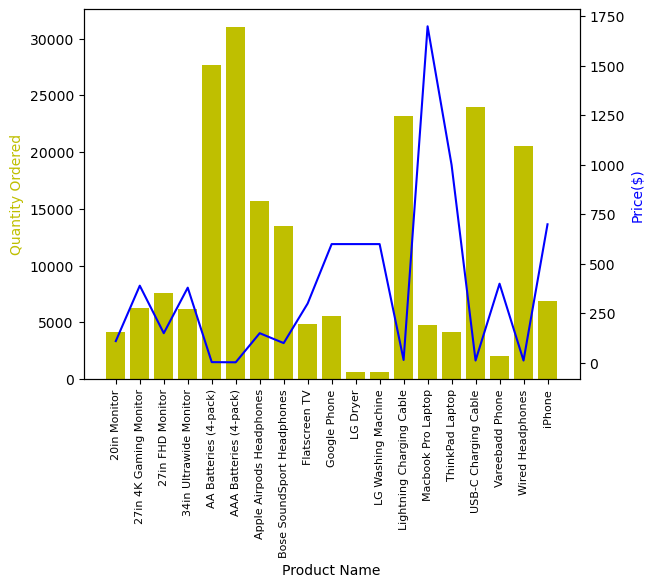

In [64]:
fig, x1 = plt.subplots()

x2 = x1.twinx()
x1.bar(products, quantity_ordered, color='y')
x2.plot(products, prices, 'b-')

x1.set_xlabel('Product Name')
x1.set_ylabel('Quantity Ordered', color='y')
x2.set_ylabel('Price($)',color='b')
x1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

 #### AAA Batteries (4-pack) were sold the most as the prices are comparatively low.